<>:71: SyntaxWarning: invalid escape sequence '\l'
<>:71: SyntaxWarning: invalid escape sequence '\l'
C:\Users\vvu\AppData\Local\Temp\ipykernel_17928\3958947386.py:71: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$\lambda_1$ (nm)', fontproperties=font_1)


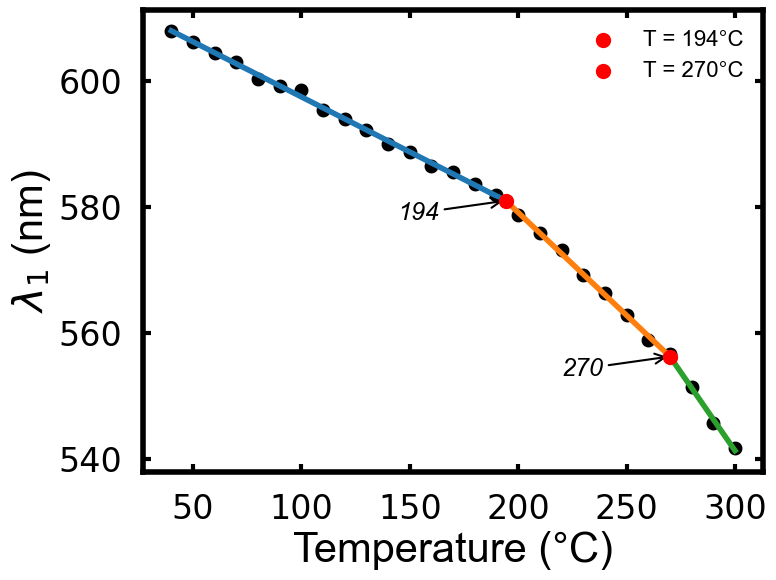

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pwlf  # Piecewise linear regression library

# Load the data
workdir = 'Q:/My Drive/Characterization/UV-vis insitu/EH-IDTBr/' #Copy and paste directory

data = pd.read_excel(workdir + 'peak analysis.xlsx', header=None) #Excel file for lambda1, lambda2, lambdamax

# Read and clean data
x = pd.to_numeric(data.iloc[1:, 0], errors='coerce').values  # Temperature (°C)
y = pd.to_numeric(data.iloc[1:, 1], errors='coerce').values  # Wavelength, change here lambda1, lambda2, lambdamax

# Handle NaNs by removing them
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]

# Perform piecewise linear regression using pwlf
def detect_piecewise_regression_pwlf(x, y, num_segments=3):
    pwlf_model = pwlf.PiecewiseLinFit(x, y)
    
    breakpoints = pwlf_model.fit(num_segments)  # Fit the model with the number of breakpoints determined by BIC 

    return pwlf_model, breakpoints

# Detect piecewise regression breakpoints
pwlf_model, breakpoints = detect_piecewise_regression_pwlf(x, y)

# Font settings
font_1 = FontProperties(family='Arial', style='normal', size=30)
font_2 = FontProperties(family='Arial', weight='normal', size=14)
font_3 = FontProperties(family='Arial', style='italic', size=18)

# Choose a color map
colors = plt.cm.tab10  # Tab10 color map

# Plot results with segments
plt.figure(figsize=(8, 6))
plt.rcParams['axes.linewidth'] = 4

# Plot the original data points
plt.scatter(x, y, color='black', linewidth=4, marker ='o')

# Plot each segment in a different color
for i in range(len(breakpoints) - 1):
    x_segment = np.linspace(breakpoints[i], breakpoints[i+1], 50)
    y_segment = pwlf_model.predict(x_segment)
    plt.plot(x_segment, y_segment, color=colors(i % 10), linewidth=4)

# Plot vertical lines and highlight change points
for i, bp in enumerate(breakpoints[1:-1]):
    y_bp = pwlf_model.predict([bp])[0]  
    plt.scatter(bp, y_bp, color='red', s=100, zorder=5, label=f'T = {bp:.0f}°C')

    # Annotate each change point with an arrow and temperature value
    plt.annotate(f'{bp:.0f}', xy=(bp, y_bp), xytext=(bp-50, y_bp-3),
                  fontproperties=font_3, color='black',
                 arrowprops=dict(arrowstyle='->', facecolor='black', lw=1.5))

# Labeling the plot
plt.xlabel('Temperature (°C)', fontproperties=font_1)
plt.ylabel('$\lambda_1$ (nm)', fontproperties=font_1) #Change here lambda1, lambda2, lambdamax
plt.legend(frameon=False, prop=FontProperties(family='Arial', size=16))
plt.tick_params(axis='both', which='major', labelsize=24, labelcolor='black', length=6,
                width=3, pad=15, direction='in', bottom=True, top=True, left=True, right=True)
plt.savefig(workdir+ 'EH-IDTBr.jpeg', bbox_inches ='tight') #Change file name here
plt.show()
